----

## Introduccion

El objetivo de este proyecto es utilizar las tecnicas de machine learning para realizar un analisis de la información de 3 region con pozos petroleros y evaluar cual es la región que tiene ganancias estimadas mas grandes y un riesgo de perdida bajo.
Se utilizara el metodo de regresión lineal para las predicciones de las reservas de los pozos y se utilizara la información del costo de la instalacion de los pozos y los ingresos por unidad de petroleo para estimar las ganancias potenciales.

## Carga de datasets e importación de librerias

In [1]:
#Importar librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import stats as st

In [2]:
#Leer datos de los datasets

data_0 = pd.read_csv("/datasets/geo_data_0.csv")
data_1 = pd.read_csv("/datasets/geo_data_1.csv")
data_2 = pd.read_csv("/datasets/geo_data_2.csv")

## Exploración inicial de datos

In [3]:
#Mostrar primeras filas del 1er dataset
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#Mostrar primeras filas del 2do dataset
data_1.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
#Mostrar primeras filas del 3er dataset
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
#Usar método info en 1er dataset
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
#Usar método info en 2do dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
#Usar método info en 3er dataset
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


En los 3 datasets no hay valores ausentes, la columna id contiene datos de tipo object y el resto de las columnas contienen datos float.

In [9]:
#Revisar si hay filas duplicadas en el 1er dataset
print(data_0.duplicated().sum())

0


In [10]:
#Revisar si hay filas duplicadas en el 2do dataset
print(data_1.duplicated().sum())

0


In [11]:
#Revisar si hay filas duplicadas en el 3er dataset
print(data_2.duplicated().sum())

0


No existen filas duplicadas en los 3 datasets

In [12]:
# Contar valores unicos en cada columna del 1er dataset
data_0.nunique()

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

In [13]:
# Contar valores unicos en cada columna del 2do dataset
data_1.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

In [14]:
# Contar valores unicos en cada columna del 3er dataset
data_2.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

En la columna product del dataset data_1 solo hay 12 valores unicos. 

In [15]:
# Definir variables features y target para 1er dataset

features_data_0 = data_0.drop(['id', 'product'], axis=1)
target_data_0 = data_0['product']

In [16]:
# Definir variables features y target para 2do dataset

features_data_1 = data_1.drop(['id', 'product'], axis=1)
target_data_1 = data_1['product']

In [17]:
# Definir variables features y target para 3er dataset

features_data_2 = data_2.drop(['id', 'product'], axis=1)
target_data_2 = data_2['product']

## Entrenamiento y prueba de modelo

### Crear funcion para divir los datos en conjuntos de entrenamiento y validación

In [18]:
# Definir funcion para divir los datos en conjunto de entrenamiento y validación

def split_train_val(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid

In [19]:
# Llamar a funcion con las variables features y target del 1er dataset
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_train_val(features_data_0, target_data_0)

### Entrenamiento de modelo y predicción para el conjunto de validación

In [20]:
# Crear funcion para entrenar el modelo de regresión lineal

def modelo_regresion_lineal(features_train, target_train, features_valid):
    model = LinearRegression() #Iniciar el modelo
    model.fit(features_train, target_train) #Entrenar el modelo con el conjunto de entrenamiento
    predictions_valid = model.predict(features_valid) #Obtener predicciones del conjunto de validación
    return predictions_valid


### Guardar las predicciones para el modelo de validación

In [21]:
# Llamar a funcion con las variables del 1er dataset

predictions_valid_0 = modelo_regresion_lineal(features_train_0, target_train_0, features_valid_0)

### Muestra el volumen medio de reservas predicho y RMSE del modelo.

In [22]:
# Crear funcion para calcular el volumen medio de reservas predicho y el RMSE del modelo

def mean_volume_RMSE(predictions_valid, target_valid): #Definir funcion con los argumentos predictions_valid y target_valid
    mean_volume = predictions_valid.mean() #definir variable para calcular la media de las predicciones
    RMSE_result = mean_squared_error(target_valid, predictions_valid)**0.5 #definir variable para calcular el RMSE
    return mean_volume, RMSE_result

In [23]:
# Llamar a funcion con las predicciones y las respuestas del 1er dataset

mean_volume_0, RMSE_result_0 = mean_volume_RMSE(predictions_valid_0, target_valid_0)

#Imprimir valores del volumen medio de las predicciones y el valor del RMSE para el 1er dataset

print("Volumen medio de reservas predicho:",mean_volume_0)
print("RMSE del modelo de regresión lineal en el conjunto de validación:", RMSE_result_0)

Volumen medio de reservas predicho: 92.59256778438035
RMSE del modelo de regresión lineal en el conjunto de validación: 37.5794217150813


### Analiza los resultados

El valor medio del volumen de reservas predicho es de 92 y el RMSE del modelo para el 1er data set es de 37 el cual es muy alto ya que es aproximadamente el 40% del valor medio de las predicciones.

### Realizar pasos anteriores para el 2do y 3er dataset

#### Entrenamiento y prueba de 2do dataset

In [24]:
# Llamar a funcion con las variables features y target del 2do dataset
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_train_val(features_data_1, target_data_1)

In [25]:
# Llamar a funcion de entrenamiento de modelo y predicción con las variables del 2do dataset

predictions_valid_1 = modelo_regresion_lineal(features_train_1, target_train_1, features_valid_1)

In [26]:
# Llamar a funcion con las predicciones y las respuestas del 2do dataset

mean_volume_1, RMSE_result_1 = mean_volume_RMSE(predictions_valid_1, target_valid_1)

#Imprimir valores del volumen medio de las predicciones y el valor del RMSE para el 1er dataset

print("Volumen medio de reservas predicho:",mean_volume_1)
print("RMSE del modelo de regresión lineal en el conjunto de validación:", RMSE_result_1)

Volumen medio de reservas predicho: 68.728546895446
RMSE del modelo de regresión lineal en el conjunto de validación: 0.893099286775617


El valor medio del volumen de reservas predicho es de 68.7 y el RMSE del modelo para el 2do dataset es de 0.89 el cual es bueno ya que es muy cercano a cero.

#### Entrenamiento y prueba de 3er dataset

In [27]:
# Llamar a funcion con las variables features y target del 3er dataset
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_train_val(features_data_2, target_data_2)

In [28]:
# Llamar a funcion de entrenamiento de modelo y predicción con las variables del 3er dataset

predictions_valid_2 = modelo_regresion_lineal(features_train_2, target_train_2, features_valid_2)

In [29]:
# Llamar a funcion con las predicciones y las respuestas del 2do dataset

mean_volume_2, RMSE_result_2 = mean_volume_RMSE(predictions_valid_2, target_valid_2)

#Imprimir valores del volumen medio de las predicciones y el valor del RMSE para el 1er dataset

print("Volumen medio de reservas predicho:",mean_volume_2)
print("RMSE del modelo de regresión lineal en el conjunto de validación:", RMSE_result_2)

Volumen medio de reservas predicho: 94.96504596800489
RMSE del modelo de regresión lineal en el conjunto de validación: 40.02970873393434


El valor medio del volumen de reservas predicho es de 94.9 y el RMSE del modelo para el 3er data set es de 40 el cual es muy alto ya que es casi el 40% del valor medio de las predicciones.

## Preparación para calculo de ganancias

#### Almacenar valores necesarios en variables

In [30]:
#Variables para el calculo de ganancias

income_per_unit = 4500
risk_treshold = 0.025
cost_200_wells = 100000000

In [31]:
# Agregar predicciones a df de datos targer de conjunto de validación
predictions_valid_0_series = pd.Series(predictions_valid_0)
predictions_valid_1_series = pd.Series(predictions_valid_1)
predictions_valid_2_series = pd.Series(predictions_valid_2)

In [32]:
# Hacer reset index a target_valid de cada region

target_valid_0_reset = target_valid_0.reset_index(drop=True)
target_valid_1_reset = target_valid_1.reset_index(drop=True)
target_valid_2_reset = target_valid_2.reset_index(drop=True)

#### Compar la media de reservas de cada región con la media minima para evitar perdidas

In [33]:
#Media de reservas de 1er dataset
print("Media de reservas de región 0:",round(target_data_0.mean(), 4))

Media de reservas de región 0: 92.5


In [34]:
#Media de reservas de 2do dataset
print("Media de reservas de región 1:",round(target_data_1.mean(), 4))

Media de reservas de región 1: 68.825


In [35]:
#Media de reservas de 3er dataset
print("Media de reservas de región 2:",round(target_data_2.mean(), 4))

Media de reservas de región 2: 95.0


Las reserva media de los pozos de las 3 regiones estan por debajo de la reserva minima necesaria por pozo para evitar perdidas.

#### Preparación del calculo del beneficio

Para calcular el beneficio se va a crear una funcion que ordene los pozos de mayor a menor en base a la predicción de las reservas
Despues se deben seleccionar los valores de reservas reales de los 200 pozos con mayores predicciones de reservas.
Y la funcion debe devolver la suma de los valores reales de las reservas multiplicado por 4500 para obtener el beneficio total de la región.

## Crear funcion para calculo de ganancia de conjunto de pozos de una región

In [36]:
#Crear funcion para calculo de ganancias de conjunto de pozos

def revenue_region(target, predictions, count, income_per_unit=income_per_unit):
    predict_sorted = predictions.sort_values(ascending=False) #Ordenar predicciones de mayor a menor
    top_200_predict = predict_sorted.head(count) # Guardar valores de los 200 pozos con mayores predicciones de reservas
    selected = target[predict_sorted.index][:count] #Seleccionar las reservas de los pozos con mayores predicciones
    estimated_revenues = selected.sum()*income_per_unit
    return estimated_revenues

In [37]:
# Ejecturar funcion para 1er region

estimated_revenues_0 = revenue_region(target_valid_0_reset, predictions_valid_0_series, 200)
print("Ingresos estimados región 0:", round(estimated_revenues_0,4))
print("Ganancias estimadas región 0:", round(estimated_revenues_0-cost_200_wells, 4))

Ingresos estimados región 0: 133208260.4314
Ganancias estimadas región 0: 33208260.4314


In [38]:
# Ejecturar funcion para 2da region

estimated_revenues_1 = revenue_region(target_valid_1_reset, predictions_valid_1_series, 200)
print("Ingresos estimados región 1:", round(estimated_revenues_1,4))
print("Ganancias estimadas región 1:", round(estimated_revenues_1-cost_200_wells, 4))

Ingresos estimados región 1: 124150866.9668
Ganancias estimadas región 1: 24150866.9668


In [39]:
# Ejecturar funcion para 3er region

estimated_revenues_2 = revenue_region(target_valid_2_reset, predictions_valid_2_series, 200)
print("Ingresos estimados región 2:", round(estimated_revenues_2,4))
print("Ganancias estimadas región 2:", round(estimated_revenues_2-cost_200_wells, 4))

Ingresos estimados región 2: 127103499.636
Ganancias estimadas región 2: 27103499.636


### Conclusiones del calculo de ganacias de cada región

La región con mayores ganancias potenciales es la 0 con un total de 33 millones de ganancia, y es la segunda con mayor promedio de reservas por pozo de con 92.5 unidades, por lo es la mejor opcion para el desarrollo de pozos petroliferos.

## Calcular riesgos y ganancias para cada region

### Calculo para 1er region

In [40]:
# Definir variable state
state = np.random.RandomState(12345)

In [41]:
#Crear funcion para realizar tecnica de bootstraping

def bootstrap_benefit(target_valid_region, predictions_valid_region): #Definir funcion
    benefit_sample = [] #Definir variable para almacenar los ingresos de cada muestra
    for i in range(1000): #Crear bucle para hacer las 1000 iteraciones para las muestras bootstrap
        target_region_subsample = target_valid_region.sample(n=500, replace=True, random_state=state) #Crear submuestra de 500 items del target
        predictions_region_subsample = predictions_valid_region[target_region_subsample.index] #Guardar los valores de las predicciones de las 500 targets en una variable
        benefit_sample.append(revenue_region(target_region_subsample, predictions_region_subsample, 200)-cost_200_wells) #Llamar a funcion de calculo de ingresos para submuestra y restarle el costo de instalacion de pozos
    
    benefit_sample = pd.Series(benefit_sample)
    return benefit_sample
    

In [42]:
#Aplicar funcion para muestras bootstrap a 1er region

benefit_samples_0 = bootstrap_benefit(target_valid_0_reset, predictions_valid_0_series)

<AxesSubplot:>

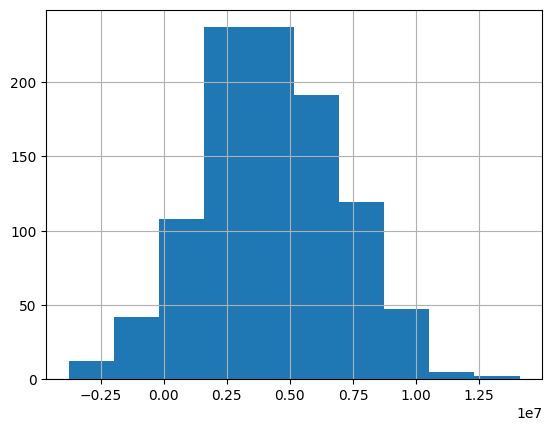

In [43]:
#Crear grafica de distribución de beneficios

benefit_samples_0.hist()

In [44]:
#Calcular beneficio promedio para región 0
mean_region_0 = benefit_samples_0.mean()
print("Beneficio promedio de region 0:",mean_region_0)

Beneficio promedio de region 0: 4259385.269105923


In [45]:
#Calcular intervalo de confianza del 95%

lower_0 = benefit_samples_0.quantile(0.025)
upper_0 = benefit_samples_0.quantile(0.975)

print('Intervalo de confianza del 95 % región 0:', lower_0, "," , upper_0)

Intervalo de confianza del 95 % región 0: -1020900.9483793724 , 9479763.533583675


In [46]:
print('Riesgo de perdida región 0:', (benefit_samples_0<0).mean()*100, '%')

Riesgo de perdida región 0: 6.0 %


### Calculo para 2da region

In [47]:
#Aplicar funcion para muestras bootstrap a 2da region

benefit_samples_1 = bootstrap_benefit(target_valid_1_reset, predictions_valid_1_series)

<AxesSubplot:>

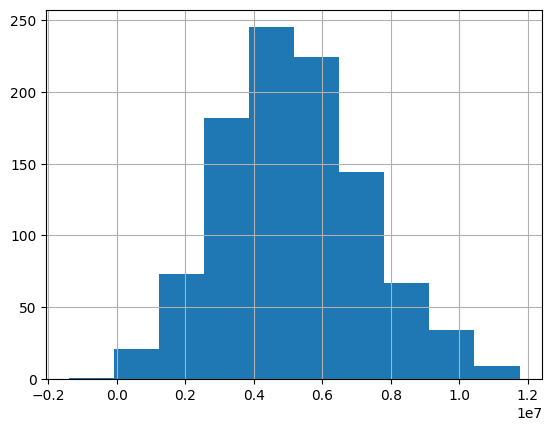

In [48]:
#Crear grafica de distribución de beneficios

benefit_samples_1.hist()

In [49]:
#Calcular beneficio promedio para región 1
mean_region_1 = benefit_samples_1.mean()
print("Beneficio promedio de region 1:",mean_region_1)

Beneficio promedio de region 1: 5182594.93697325


In [50]:
#Calcular intervalo de confianza del 95%

lower_1 = benefit_samples_1.quantile(0.025)
upper_1 = benefit_samples_1.quantile(0.975)

print('Intervalo de confianza del 95 % región 1:', lower_1, "," , upper_1)

Intervalo de confianza del 95 % región 1: 1281232.3143308456 , 9536129.820669085


In [51]:
print('Riesgo de perdida región 1:', (benefit_samples_1<0).mean()*100, '%')

Riesgo de perdida región 1: 0.3 %


### Calculo para 3er region

In [52]:
#Aplicar funcion para muestras bootstrap a 3er region

benefit_samples_2 = bootstrap_benefit(target_valid_2_reset, predictions_valid_2_series)

<AxesSubplot:>

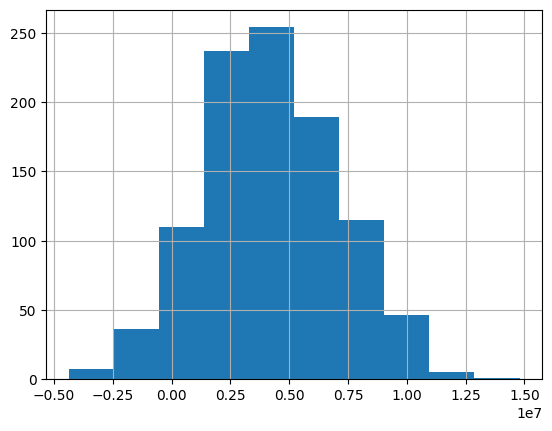

In [53]:
#Crear grafica de distribución de beneficios

benefit_samples_2.hist()

In [54]:
#Calcular beneficio promedio para región 2
mean_region_2 = benefit_samples_2.mean()
print("Beneficio promedio de region 2:",mean_region_2)

Beneficio promedio de region 2: 4201940.0534405


In [55]:
#Calcular intervalo de confianza del 95%

lower_2 = benefit_samples_2.quantile(0.025)
upper_2 = benefit_samples_2.quantile(0.975)

print('Intervalo de confianza del 95 % región 1:', lower_2, "," , upper_2)

Intervalo de confianza del 95 % región 1: -1158526.0916001017 , 9896299.398445744


In [56]:
#Aplicar funcion para calculo de riesgo de perdida para 3er region
print('Riesgo de perdida región 2:', (benefit_samples_2<0).mean()*100, '%')

Riesgo de perdida región 2: 6.2 %


## Conclusión

Durante la ejecución de este proyecto se realizo el entrenamiento del modelo utilizando la tecnica de regresión y con el conjunto de entrenamiento que representó el 75% de los datos y se generaron las predicciones para el conjunto de validación.
Para las regiones 0 y 2 los valores de RMSE son altos, lo que significa que el modelo no predice tan adecuadamente los valores objetivo, para la región 1 el modelo se ajusto mejor y obtuvimos un RMSE cercano a 0.
Al realizar el calculo de ganancias con el conjunto de validación completo y la seleccion de los 200 pozos con mayores predicciones de reservas, se encontro que las ganancias potenciales en todas las regiones eran de alrededor de 24 a 33 millones de dolares y la región com mayores ganancias potenciales era la 0.

Al utilizar la tecnica de bootstrap y utilizar submuestras de 500 valores para el calculo de las ganancias potenciales de cada región se encontro que las ganancias potenciales para la mayoria de las regiones se encontraban entre 4 y 5 millones, el cual es mucho menor al obtenido anteriormente.

Solo se encontro una región con riesgo de perdida menor al 2.5% la cual es la región 1 con un riesgo menor a 1%, y con las ganancias promedio mas altas de 5 millones, por lo cual es la región mas adecuada para el desarrollo de pozos.
Este resultado no coincide con el obtenido anteriormente en el cual se había elegido a las región 0 para el desarrollo de los pozos.